### X  CLINICAL TRIAL DATA ANALYSIS

<b>PATH A: DATA ANALYSIS</b>

A novel cancer treatment called X is under development for solid tumors. In a recent clinical trial, data was collected to compare the efficacy of X to the current standard of care (referred to as the 'control'). The trial has been concluded and the data is up for analysis. 

The primary aim of this analysis is to evaluate and compare the effectiveness of a medicatiion under clinical trial to the standard of care and investigate potential variations in treatment benefits among different patient sub-groups.

DISCLAIMER: DATASET IS A MOCK VERSION AND SYNTHETICALLY GENERATED. 

In [1]:
#!pip install imblearn

In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [3]:
#Content of the clinical study table after joining protein concentration.
c_study_df = pd.read_excel("clinical-study_Naz.xlsx")
c_study= c_study_df.copy()
c_study

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.000,Female,84.660,1.59000,DRUG,N,148.0
1,SUBJ_001,46.000,Female,84.660,1.59000,DRUG,N,148.0
2,SUBJ_002,47.000,Female,71.210,1.64000,DRUG,Y,85.0
3,SUBJ_003,48.000,Female,69.850,1.73000,CONTROL,N,183.0
4,SUBJ_004,59.000,Female,62.940,1.50000,DRUG,Y,89.0
...,...,...,...,...,...,...,...,...
767,SUBJ_767,53.000,Male,88.670,1.72000,DRUG,Y,126.0
768,SUBJ_768,68.000,Female,80.290,1.63000,DRUG,Y,93.0
769,SUBJ_A69,7.200,Female,22.310,1.19300,DRUG,N,NaN
770,SUBJ_A70,8.310,Female,24.220,1.27440,CONTROL,N,NaN


In [4]:
#Count values of the data
c_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subject_id             772 non-null    object 
 1   age                    772 non-null    float64
 2   sex                    772 non-null    object 
 3   weight                 761 non-null    float64
 4   height                 772 non-null    float64
 5   trt_grp                772 non-null    object 
 6   RESPONSE               772 non-null    object 
 7   protein_concentration  764 non-null    float64
dtypes: float64(4), object(4)
memory usage: 48.4+ KB


In [5]:
#Summary statistics of the data
c_study.describe()

,age,weight,height,protein_concentration
count,772.000000,761.000000,772.000000,764.000000
mean,61.580782,91.110074,1.677462,121.721204
std,7.866491,22.489547,0.101405,30.530470
min,7.200000,22.310000,1.193000,44.000000
25%,57.000000,75.550000,1.600000,99.000000
50%,62.000000,88.870000,1.670000,117.000000
75%,67.000000,104.650000,1.760000,141.000000
max,79.000000,182.500000,1.940000,199.000000


In [6]:
#Check for null values
c_study.isnull().sum()

subject_id                0
age                       0
sex                       0
weight                   11
height                    0
trt_grp                   0
RESPONSE                  0
protein_concentration     8
dtype: int64

### Check for errors per column of the dataframe and clean

## 1. subject_id

In [7]:
#check for unique values in subject_id column
c_study.subject_id.unique()

array(['SUBJ_001', 'SUBJ_002', 'SUBJ_003', 'SUBJ_004', 'SUBJ_005',
       'SUBJ_006', 'SUBJ_007', 'SUBJ_008', 'SUBJ_009', 'SUBJ_010',
       'SUBJ_011', 'SUBJ_012', 'SUBJ_013', 'SUBJ_014', 'SUBJ_015',
       'SUBJ_016', 'SUBJ_017', 'SUBJ_018', 'SUBJ_019', 'SUBJ_020',
       'SUBJ_021', 'SUBJ_022', 'SUBJ_023', 'SUBJ_024', 'SUBJ_025',
       'SUBJ_026', 'SUBJ_027', 'SUBJ_028', 'SUBJ_029', 'SUBJ_030',
       'SUBJ_031', 'SUBJ_032', 'SUBJ_033', 'SUBJ_034', 'SUBJ_035',
       'SUBJ_036', 'SUBJ_037', 'SUBJ_038', 'SUBJ_039', 'SUBJ_040',
       'SUBJ_041', 'SUBJ_042', 'SUBJ_043', 'SUBJ_044', 'SUBJ_045',
       'SUBJ_046', 'SUBJ_047', 'SUBJ_048', 'SUBJ_049', 'SUBJ_050',
       'SUBJ_051', 'SUBJ_052', 'SUBJ_053', 'SUBJ_054', 'SUBJ_055',
       'SUBJ_056', 'SUBJ_057', 'SUBJ_058', 'SUBJ_059', 'SUBJ_060',
       'SUBJ_061', 'SUBJ_062', 'SUBJ_063', 'SUBJ_064', 'SUBJ_065',
       'SUBJ_066', 'SUBJ_067', 'SUBJ_068', 'SUBJ_069', 'SUBJ_070',
       'SUBJ_071', 'SUBJ_072', 'SUBJ_073', 'SUBJ_074', 'SUBJ_0

Column datatype is okay: object datatype

In [8]:
#check for empty strings in the subject_id column. No empty strings.
c_study[c_study["subject_id"]== " "]

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration


In [9]:
#Checks for null values. No null values
c_study["subject_id"].isna().sum() 

0

## 2. age 

In [10]:
#summary statistics of the age column before cleaning
c_study.age.describe()

count    772.000000
mean      61.580782
std        7.866491
min        7.200000
25%       57.000000
50%       62.000000
75%       67.000000
max       79.000000
Name: age, dtype: float64

In [11]:
#Check for unique values in the age column
c_study.age.unique()

array([46.   , 47.   , 48.   , 59.   , 63.   , 77.   , 57.   , 72.   ,
       73.   , 67.   , 53.   , 58.   , 55.   , 65.   , 54.   , 51.   ,
       61.   , 56.   , 64.   , 66.   , 69.   , 70.   , 49.   , 62.   ,
       68.   , 71.   , 60.   , 52.   , 78.   , 79.   , 43.   , 44.   ,
       76.   , 39.   , 74.   , 50.   , 45.   , 75.   , 37.   ,  7.2  ,
        8.31 ,  7.854])

In [12]:
#Checks for entries within the age column which are empty strings. No empty strings.
c_study[c_study["age"] == ' ']

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration


In [13]:
#Checks for null values. No null values
c_study["age"].isna().sum() 

0

In [14]:
'''
ISSUES FOUND
1. 3 subjects are minors below the formal consent age for clinical trials.(WMA - The World Medical Association
                                                                           -WMA Declaration of Helsinki)
2. The same 3 subjects have null values for protein_concentration.

'''
#Check for study participants less than age of formal consent for clinical trials as eligibility/inclusion criteria. 
#All have null values for protein concentration
c_study.loc[c_study["age"] <18]

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
769,SUBJ_A69,7.200,Female,22.310,1.19300,DRUG,N,NaN
770,SUBJ_A70,8.310,Female,24.220,1.27440,CONTROL,N,NaN
771,SUBJ_A71,7.854,Male,23.176,1.26343,CONTROL,N,NaN


#### Fixing age column

1. Delete the rows with information of minors

In [15]:
# Delete rows with the specific ages
c_study = c_study[~c_study['age'].isin([7.2, 8.31, 7.854])]

In [16]:
#Check to see that the 3 minors are successfully deleted. Successful
c_study.loc[c_study["age"] <16]

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration


In [17]:
#Check for unique values in the age column
c_study.age.unique()

array([46., 47., 48., 59., 63., 77., 57., 72., 73., 67., 53., 58., 55.,
       65., 54., 51., 61., 56., 64., 66., 69., 70., 49., 62., 68., 71.,
       60., 52., 78., 79., 43., 44., 76., 39., 74., 50., 45., 75., 37.])

## 3. sex

In [18]:
 #Checks for individual unique values for sex and the count
c_study["sex"].value_counts()

Female    390
Male      379
Name: sex, dtype: int64

In [19]:
#Check for null values for sex.
c_study["sex"].isna().sum() 

0

sex column seems ok. No missing values and no empty strings.

## 4. weight

In [20]:
#Checks for entries within the weight column which are empty strings. No empty strings.
c_study[c_study["weight"] == ' ']

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration


In [21]:
#Check for the weight column data type to ensure all are float datatype
c_study.weight.info()

<class 'pandas.core.series.Series'>
Int64Index: 769 entries, 0 to 768
Series name: weight
Non-Null Count  Dtype  
--------------  -----  
758 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB


In [22]:
'''
ISSUES FOUND

1. 11 null values exist in the weight column.
'''
#Check for null values for weight.
c_study["weight"].isna().sum() 

11

In [23]:
#use loc function to locate the 11 entries containing the null values
null_weight= c_study.loc[c_study["weight"].isna()]
null_weight

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
10,SUBJ_010,73.0,Female,NaN,1.64,DRUG,Y,125.0
50,SUBJ_050,65.0,Male,NaN,1.71,DRUG,N,105.0
61,SUBJ_061,61.0,Male,NaN,1.79,CONTROL,N,84.0
82,SUBJ_082,65.0,Male,NaN,1.78,CONTROL,N,74.0
146,SUBJ_146,56.0,Female,NaN,1.57,CONTROL,N,102.0
372,SUBJ_372,67.0,Female,NaN,1.62,CONTROL,N,118.0
427,SUBJ_427,66.0,Male,NaN,1.83,CONTROL,N,94.0
495,SUBJ_495,60.0,Female,NaN,1.65,CONTROL,N,80.0
523,SUBJ_523,62.0,Female,NaN,1.60,DRUG,N,114.0
685,SUBJ_685,74.0,Male,NaN,1.81,CONTROL,N,136.0


### Fixing weight column

1. The weight for 11 participants are unknown at this point. To obtain the expected weight of these participants, the mean weight of persons with the same age and gender as the NaN values are calculated and the mising weights are replaced with this value. Mean was used as the measure of central tendency to avoid outliers.

An alternative could be the use of D. R. Miller Formula (1983) to calculate the ideal body weight(IBW) (Pai & Paloucek, 2000)

In [24]:
'''
Define a function that checks if a participant's weight is NaN, obtains the mean weight of the participants with 
common age and gender, and replaces the missing weight with the mean weight of persons in the specified condition.
'''
def fill_missing_weights(df):
    
    # Group the DataFrame by age and gender and then calculate mean weight
    mean_weights = df.groupby(["age", "sex"])["weight"].mean()

    # Iterate over the DataFrame rows
    for index, row in df.iterrows():
        # Check if weight is missing (NaN)
        if pd.isnull(row["weight"]):
            # Obtain the age and gender of the current row
            ages = row["age"]
            sexs = row["sex"]

            # Get the mean weight for the corresponding age and gender
            mean_weight = mean_weights.loc[(ages, sexs)]

            # Replace the missing weight with the mean value
            df.at[index, "weight"] = mean_weight

    return df


In [25]:
#Full dataframe showing that all NaN weights have been filled.
clinical_study = fill_missing_weights(c_study)
# Set the display options to show all values
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
clinical_study 

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.660000,1.59,DRUG,N,148.0
1,SUBJ_001,46.0,Female,84.660000,1.59,DRUG,N,148.0
2,SUBJ_002,47.0,Female,71.210000,1.64,DRUG,Y,85.0
3,SUBJ_003,48.0,Female,69.850000,1.73,CONTROL,N,183.0
4,SUBJ_004,59.0,Female,62.940000,1.50,DRUG,Y,89.0
5,SUBJ_005,59.0,Female,113.910000,1.63,CONTROL,N,137.0
6,SUBJ_006,63.0,Male,79.330000,1.77,CONTROL,Y,116.0
7,SUBJ_007,77.0,Male,96.120000,1.77,CONTROL,N,78.0
8,SUBJ_008,57.0,Male,93.500000,1.63,DRUG,N,115.0
9,SUBJ_009,72.0,Male,85.570000,1.68,DRUG,N,197.0


In [26]:
#Check if the null weight values have been replaced. Successfully replaced
clinical_study.loc[clinical_study["weight"].isna()]

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration


In [27]:
c_study.loc[(c_study["sex"] == "Male") & (c_study["age"] == 65) & (~c_study["weight"].isna())]

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
15,SUBJ_015,65.0,Male,80.210000,1.77,DRUG,N,166.0
50,SUBJ_050,65.0,Male,99.276471,1.71,DRUG,N,105.0
53,SUBJ_053,65.0,Male,64.840000,1.64,CONTROL,Y,88.0
67,SUBJ_067,65.0,Male,97.000000,1.73,CONTROL,Y,109.0
82,SUBJ_082,65.0,Male,99.276471,1.78,CONTROL,N,74.0
103,SUBJ_103,65.0,Male,68.010000,1.75,CONTROL,N,125.0
155,SUBJ_155,65.0,Male,148.860000,1.77,DRUG,N,188.0
162,SUBJ_162,65.0,Male,108.430000,1.71,DRUG,Y,102.0
195,SUBJ_195,65.0,Male,73.650000,1.74,CONTROL,Y,85.0
318,SUBJ_318,65.0,Male,90.610000,1.73,CONTROL,N,182.0


In [28]:
# Confirming the expected weight for SUBJ_050 age and gender as determinants
c_study.loc[(c_study["sex"] == "Male") & (c_study["age"] == 65) & (~c_study["weight"].isna())].describe()

,age,weight,height,protein_concentration
count,19.0,19.000000,19.000000,19.000000
mean,65.0,99.276471,1.744211,123.263158
std,0.0,28.066486,0.040868,33.038432
min,65.0,64.840000,1.640000,74.000000
25%,65.0,83.355000,1.725000,103.500000
50%,65.0,92.140000,1.760000,122.000000
75%,65.0,108.890000,1.770000,148.000000
max,65.0,182.500000,1.800000,188.000000


### Calculate the BMI of the study participants and insert the new column

In [29]:
#Calculate the BMI of the study participants by dividing the weight in kilograms by the height in metres squared.
#Insert the new column at index 5 in the table.
clinical_study.insert(5, "BMI", clinical_study["weight"] / (clinical_study["height"] ** 2))
clinical_study

,subject_id,age,sex,weight,height,BMI,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.660000,1.59,33.487599,DRUG,N,148.0
1,SUBJ_001,46.0,Female,84.660000,1.59,33.487599,DRUG,N,148.0
2,SUBJ_002,47.0,Female,71.210000,1.64,26.476056,DRUG,Y,85.0
3,SUBJ_003,48.0,Female,69.850000,1.73,23.338568,CONTROL,N,183.0
4,SUBJ_004,59.0,Female,62.940000,1.50,27.973333,DRUG,Y,89.0
5,SUBJ_005,59.0,Female,113.910000,1.63,42.873273,CONTROL,N,137.0
6,SUBJ_006,63.0,Male,79.330000,1.77,25.321587,CONTROL,Y,116.0
7,SUBJ_007,77.0,Male,96.120000,1.77,30.680839,CONTROL,N,78.0
8,SUBJ_008,57.0,Male,93.500000,1.63,35.191388,DRUG,N,115.0
9,SUBJ_009,72.0,Male,85.570000,1.68,30.318169,DRUG,N,197.0


## 5. height

In [30]:
#Checks for entries within the height column which are empty strings. No empty strings.
clinical_study[c_study["height"] == ' ']

,subject_id,age,sex,weight,height,BMI,trt_grp,RESPONSE,protein_concentration


In [31]:
#Check for null values for height.
clinical_study["height"].isna().sum() 

0

In [32]:
#Check for the height column's data type to ensure all are float datatype
c_study.height.info()

<class 'pandas.core.series.Series'>
Int64Index: 769 entries, 0 to 768
Series name: height
Non-Null Count  Dtype  
--------------  -----  
769 non-null    float64
dtypes: float64(1)
memory usage: 28.2 KB


height column has no errors

## 6. BMI

In [33]:
#Checks for entries within the BMI  column which are empty strings. No empty strings.
clinical_study[clinical_study["BMI"] == ' ']

,subject_id,age,sex,weight,height,BMI,trt_grp,RESPONSE,protein_concentration


In [34]:
#Check for null values for BMI.
clinical_study["BMI"].isna().sum()

0

## 7. trt_grp

In [35]:
#Checks for entries within the trt_grp  column which are empty strings. No empty strings.
clinical_study[clinical_study["trt_grp"] == ' ']

,subject_id,age,sex,weight,height,BMI,trt_grp,RESPONSE,protein_concentration


In [36]:
#Check for null values for trt_grp.
clinical_study["trt_grp"].isna().sum()

0

## 8. RESPONSE

In [37]:
#Checks for entries within the RESPONSE  column which are empty strings. No empty strings.
clinical_study[clinical_study["RESPONSE"] == ' ']

,subject_id,age,sex,weight,height,BMI,trt_grp,RESPONSE,protein_concentration


In [38]:
#Check for null values for RESPONSE.
clinical_study["RESPONSE"].isna().sum()

0

In [39]:
### Convert the RESPONSE column to categorical
clinical_study["RESPONSE"] = clinical_study["RESPONSE"].astype("category")


In [40]:
#Check that the column is successfully converted to categorical data type
clinical_study["RESPONSE"].info()

<class 'pandas.core.series.Series'>
Int64Index: 769 entries, 0 to 768
Series name: RESPONSE
Non-Null Count  Dtype   
--------------  -----   
769 non-null    category
dtypes: category(1)
memory usage: 23.0 KB


## 9. protein_concentration

In [41]:
#Checks for entries within the protein_concentration  column which are empty strings. No empty strings.
clinical_study[clinical_study["protein_concentration"] == ' ']

,subject_id,age,sex,weight,height,BMI,trt_grp,RESPONSE,protein_concentration


In [42]:
#Check for null values for protein_concentration.
clinical_study["protein_concentration"].isna().sum()

5

In [43]:
clinical_study.loc[clinical_study["protein_concentration"].isna()]

,subject_id,age,sex,weight,height,BMI,trt_grp,RESPONSE,protein_concentration
76,SUBJ_076,78.0,Male,78.92,1.79,24.630942,DRUG,N,NaN
183,SUBJ_183,56.0,Male,91.92,1.83,27.447819,DRUG,N,NaN
343,SUBJ_343,70.0,Male,92.01,1.70,31.837370,DRUG,N,NaN
350,SUBJ_350,51.0,Male,118.81,1.71,40.631305,DRUG,Y,NaN
503,SUBJ_503,66.0,Female,91.89,1.53,39.254133,CONTROL,Y,NaN


In [44]:
clinical_study.loc[~clinical_study["protein_concentration"].isna()].describe()


,age,weight,height,BMI,protein_concentration
count,764.000000,764.000000,764.000000,764.000000,764.000000
mean,61.774869,91.365555,1.678940,32.315536,121.721204
std,7.103179,22.028205,0.097804,6.870290,30.530470
min,37.000000,46.170000,1.420000,17.975421,44.000000
25%,57.000000,75.905000,1.600000,27.363995,99.000000
50%,62.000000,88.875000,1.670000,32.122245,117.000000
75%,67.000000,104.400000,1.760000,36.315255,141.000000
max,79.000000,182.500000,1.940000,67.515601,199.000000


In [45]:
#Replace the null values in protein_concentration with the mean protein concentration
mean_protein_concentration = clinical_study["protein_concentration"].mean()

clinical_study["protein_concentration"].fillna(mean_protein_concentration, inplace=True)


In [46]:
#Coonfirm that null values were successfully replaced.
clinical_study.loc[clinical_study["protein_concentration"].isna()]

,subject_id,age,sex,weight,height,BMI,trt_grp,RESPONSE,protein_concentration


In [47]:
clinical_study.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   subject_id             769 non-null    object  
 1   age                    769 non-null    float64 
 2   sex                    769 non-null    object  
 3   weight                 769 non-null    float64 
 4   height                 769 non-null    float64 
 5   BMI                    769 non-null    float64 
 6   trt_grp                769 non-null    object  
 7   RESPONSE               769 non-null    category
 8   protein_concentration  769 non-null    float64 
dtypes: category(1), float64(5), object(3)
memory usage: 71.1+ KB


In [48]:
clinical_study

,subject_id,age,sex,weight,height,BMI,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.660000,1.59,33.487599,DRUG,N,148.000000
1,SUBJ_001,46.0,Female,84.660000,1.59,33.487599,DRUG,N,148.000000
2,SUBJ_002,47.0,Female,71.210000,1.64,26.476056,DRUG,Y,85.000000
3,SUBJ_003,48.0,Female,69.850000,1.73,23.338568,CONTROL,N,183.000000
4,SUBJ_004,59.0,Female,62.940000,1.50,27.973333,DRUG,Y,89.000000
5,SUBJ_005,59.0,Female,113.910000,1.63,42.873273,CONTROL,N,137.000000
6,SUBJ_006,63.0,Male,79.330000,1.77,25.321587,CONTROL,Y,116.000000
7,SUBJ_007,77.0,Male,96.120000,1.77,30.680839,CONTROL,N,78.000000
8,SUBJ_008,57.0,Male,93.500000,1.63,35.191388,DRUG,N,115.000000
9,SUBJ_009,72.0,Male,85.570000,1.68,30.318169,DRUG,N,197.000000


### CHECK FOR DUPLICATES

In [49]:
duplicates = clinical_study.duplicated(keep=False)
duplicated_rows = clinical_study[duplicates]
duplicated_rows

,subject_id,age,sex,weight,height,BMI,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,33.487599,DRUG,N,148.0
1,SUBJ_001,46.0,Female,84.66,1.59,33.487599,DRUG,N,148.0


In [50]:
#drop the duplicate row
clinical_study.drop_duplicates(inplace=True)
clinical_study

,subject_id,age,sex,weight,height,BMI,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.660000,1.59,33.487599,DRUG,N,148.000000
2,SUBJ_002,47.0,Female,71.210000,1.64,26.476056,DRUG,Y,85.000000
3,SUBJ_003,48.0,Female,69.850000,1.73,23.338568,CONTROL,N,183.000000
4,SUBJ_004,59.0,Female,62.940000,1.50,27.973333,DRUG,Y,89.000000
5,SUBJ_005,59.0,Female,113.910000,1.63,42.873273,CONTROL,N,137.000000
6,SUBJ_006,63.0,Male,79.330000,1.77,25.321587,CONTROL,Y,116.000000
7,SUBJ_007,77.0,Male,96.120000,1.77,30.680839,CONTROL,N,78.000000
8,SUBJ_008,57.0,Male,93.500000,1.63,35.191388,DRUG,N,115.000000
9,SUBJ_009,72.0,Male,85.570000,1.68,30.318169,DRUG,N,197.000000
10,SUBJ_010,73.0,Female,82.727500,1.64,30.758291,DRUG,Y,125.000000


## DATA CLEANING DONE!

## DATA AGGREGATION

## How do the two treatment groups compare in terms of response?

In [51]:
#summary of response between two treatment groups 
trtgrp_response_comparison = clinical_study.groupby('trt_grp')['RESPONSE'].value_counts()
trtgrp_response_comparison

trt_grp   
CONTROL  N    261
         Y    124
DRUG     Y    210
         N    173
Name: RESPONSE, dtype: int64

# PROTEIN CONCENTRATION

## How does protein concentration compare for combinations of treatment group and response?

In [52]:
#summary stat of protein concentration in treatment group and response
protein_describe_comparison = clinical_study.groupby(['RESPONSE', 'trt_grp'])['protein_concentration'].describe()
print("Summary statistics of protein concentration in the two treatment arms and Response")
protein_describe_comparison

Summary statistics of protein concentration in the two treatment arms and Response


count        mean        std   min     25%    50%     75%  \
RESPONSE trt_grp                                                              
N        CONTROL  261.0  128.796935  30.356234  65.0  107.00  124.0  149.00   
         DRUG     173.0  144.070310  26.952928  83.0  125.00  143.0  163.00   
Y        CONTROL  124.0  105.513881  25.055362  44.0   90.00  103.0  118.25   
         DRUG     210.0  103.960577  18.361041  56.0   91.25  102.5  116.00   

                    max  
RESPONSE trt_grp         
N        CONTROL  198.0  
         DRUG     199.0  
Y        CONTROL  187.0  
         DRUG     174.0

In [53]:
#How does mean protein concentration compare for combinations of treatment group and response?
protein_trtgrp_response_comparison = clinical_study.groupby(['trt_grp', 'RESPONSE'])['protein_concentration'].mean()
protein_trtgrp_response_comparison

trt_grp  RESPONSE
CONTROL  N           128.796935
         Y           105.513881
DRUG     N           144.070310
         Y           103.960577
Name: protein_concentration, dtype: float64

In [54]:
#Mean protein concentration in responders and non-responders
#How does protein concentration compare for responders vs. non-responders?
protein_response_comparison = clinical_study.groupby('RESPONSE')['protein_concentration'].mean()
protein_response_comparison

RESPONSE
N    134.885170
Y    104.537253
Name: protein_concentration, dtype: float64

In [55]:
#Mean protein concentration in treatment group
protein_trtgrp_comparison = clinical_study.groupby('trt_grp')['protein_concentration'].mean()
protein_trtgrp_comparison

trt_grp
CONTROL    121.297977
DRUG       122.078028
Name: protein_concentration, dtype: float64

In [56]:
#summary stats of protein concentration and trt_grp
trtgrp_pc_comparison = clinical_study.groupby('trt_grp')['protein_concentration'].describe()
trtgrp_pc_comparison

,count,mean,std,min,25%,50%,75%,max
trt_grp,,,,,,,,
CONTROL,385.0,121.297977,30.719511,44.0,100.0,117.0,139.0,198.0
DRUG,383.0,122.078028,30.183339,56.0,99.5,118.0,141.5,199.0


In [57]:
#summary stats of protein_concentration and response
response_pc_comparison = clinical_study.groupby('RESPONSE')['protein_concentration'].describe()
response_pc_comparison

,count,mean,std,min,25%,50%,75%,max
RESPONSE,,,,,,,,
N,434.0,134.885170,29.965772,65.0,112.0,132.5,155.0,199.0
Y,334.0,104.537253,21.072140,44.0,91.0,103.0,117.0,187.0


# AGE

## How does age compare for combinations of treatment group and response?

In [58]:
#summary stat of age in treatment group and response
age_describe_comparison = clinical_study.groupby(['RESPONSE', 'trt_grp'])['age'].describe()
print("         Summary statistics of age in the two treatment arms and Response")
age_describe_comparison

         Summary statistics of age in the two treatment arms and Response


count       mean       std   min   25%   50%   75%   max
RESPONSE trt_grp                                                          
N        CONTROL  261.0  62.042146  6.622960  43.0  58.0  62.0  67.0  79.0
         DRUG     173.0  61.306358  7.443103  37.0  56.0  62.0  66.0  79.0
Y        CONTROL  124.0  61.483871  6.654644  39.0  58.0  61.0  66.0  79.0
         DRUG     210.0  62.133333  7.662831  37.0  57.0  63.0  68.0  79.0

In [59]:
#How does the age of patients compare for the two treatment groups and RESPONSE?
#How does mean age compare for combinations of treatment group and response?
age_trtgrp_response_comparison = clinical_study.groupby(['trt_grp', 'RESPONSE'])['age'].mean()
age_trtgrp_response_comparison

trt_grp  RESPONSE
CONTROL  N           62.042146
         Y           61.483871
DRUG     N           61.306358
         Y           62.133333
Name: age, dtype: float64

In [60]:
#Mean age in responders and non-responders
#How does age compare for responders vs. non-responders?
age_response_comparison = clinical_study.groupby('RESPONSE')['age'].mean()
age_response_comparison

RESPONSE
N    61.748848
Y    61.892216
Name: age, dtype: float64

In [61]:
#Mean age in treatment group
age_trtgrp_comparison = clinical_study.groupby('trt_grp')['age'].mean()
age_trtgrp_comparison

trt_grp
CONTROL    61.862338
DRUG       61.759791
Name: age, dtype: float64

In [62]:
#summary stats of age and trt_grp
trtgrp_age_comparison = clinical_study.groupby('trt_grp')['age'].describe()
trtgrp_age_comparison

,count,mean,std,min,25%,50%,75%,max
trt_grp,,,,,,,,
CONTROL,385.0,61.862338,6.629657,39.0,58.0,62.0,67.0,79.0
DRUG,383.0,61.759791,7.565750,37.0,57.0,62.0,67.0,79.0


In [63]:
#summary stats of age and response
age_weight_comparison = clinical_study.groupby('RESPONSE')['age'].describe()
age_weight_comparison

,count,mean,std,min,25%,50%,75%,max
RESPONSE,,,,,,,,
N,434.0,61.748848,6.962391,37.0,57.0,62.0,67.0,79.0
Y,334.0,61.892216,7.301347,37.0,57.0,62.0,67.0,79.0


# WEIGHT

## How does the weight of patients compare for the two treatment groups and response?

In [64]:
#summary stat of weight in treatment group and response
weight_describe_comparison = clinical_study.groupby(['RESPONSE', 'trt_grp'])['weight'].describe()
print("         Summary statistics of weight in the two treatment arms and Response")
weight_describe_comparison

         Summary statistics of weight in the two treatment arms and Response


count       mean        std    min      25%    50%     75%  \
RESPONSE trt_grp                                                               
N        CONTROL  261.0  89.846089  20.090712  50.29  75.9400  86.98  102.84   
         DRUG     173.0  90.171240  21.644136  47.31  75.5100  87.51  103.93   
Y        CONTROL  124.0  96.397742  23.730525  55.68  80.0225  91.62  108.09   
         DRUG     210.0  91.378095  23.182871  46.17  73.4425  89.39  105.49   

                     max  
RESPONSE trt_grp          
N        CONTROL  165.66  
         DRUG     151.28  
Y        CONTROL  182.50  
         DRUG     160.12

In [65]:
#How does the weight of patients compare for the two treatment groups and RESPONSE?
#How does mean weight compare for combinations of treatment group and response?
weight_trtgrp_response_comparison = clinical_study.groupby(['trt_grp', 'RESPONSE'])['weight'].mean()
weight_trtgrp_response_comparison

trt_grp  RESPONSE
CONTROL  N           89.846089
         Y           96.397742
DRUG     N           90.171240
         Y           91.378095
Name: weight, dtype: float64

In [66]:
#Mean weight in responders and non-responders
#How does weight compare for responders vs. non-responders?
weight_response_comparison = clinical_study.groupby('RESPONSE')['weight'].mean()
weight_response_comparison

RESPONSE
N    89.975700
Y    93.241677
Name: weight, dtype: float64

In [67]:
#Mean weight in treatment group
weight_trtgrp_comparison = clinical_study.groupby('trt_grp')['weight'].mean()
weight_trtgrp_comparison

trt_grp
CONTROL    91.956232
DRUG       90.832962
Name: weight, dtype: float64

In [68]:
#summary stats of weight and trt_grp
trtgrp_weight_comparison = clinical_study.groupby('trt_grp')['weight'].describe()
trtgrp_weight_comparison

,count,mean,std,min,25%,50%,75%,max
trt_grp,,,,,,,,
CONTROL,385.0,91.956232,21.519117,50.29,76.91,88.99,104.580,182.50
DRUG,383.0,90.832962,22.479827,46.17,74.34,88.98,104.135,160.12


In [69]:
#summary stats of weight and response
response_weight_comparison = clinical_study.groupby('RESPONSE')['weight'].describe()
response_weight_comparison

,count,mean,std,min,25%,50%,75%,max
RESPONSE,,,,,,,,
N,434.0,89.975700,20.699831,47.31,75.7250,87.240,103.0975,165.66
Y,334.0,93.241677,23.478091,46.17,76.2275,91.165,107.3350,182.50


## VISUALISATION

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'weight'),
  Text(2.5, 0, 'height'),
  Text(3.5, 0, 'BMI'),
  Text(4.5, 0, 'protein_concentration')])

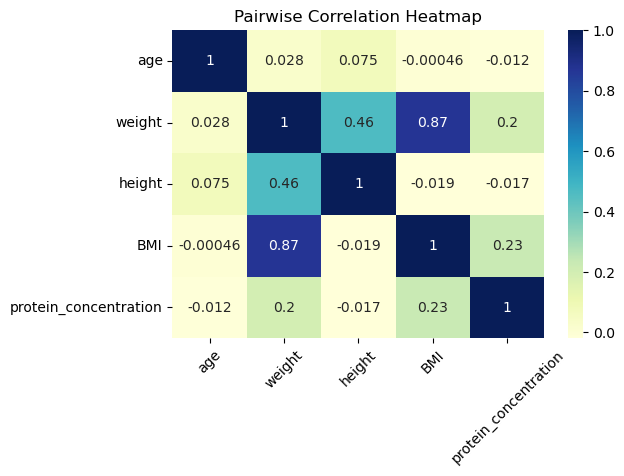

In [70]:
#Select the numerical datatype to plot a correlation heat map.
numerical_data = clinical_study.select_dtypes(exclude = "object")

#Assign the pairwise correlation of columns to a variable
heatmap_data = numerical_data.corr()

#Set size of plot
plt.figure(figsize = (6,4))


#Heatmap to visualise correlation
sns.heatmap(heatmap_data, annot= True, cmap = "YlGnBu")

plt.title("Pairwise Correlation Heatmap")

plt.xticks(rotation =45)
       

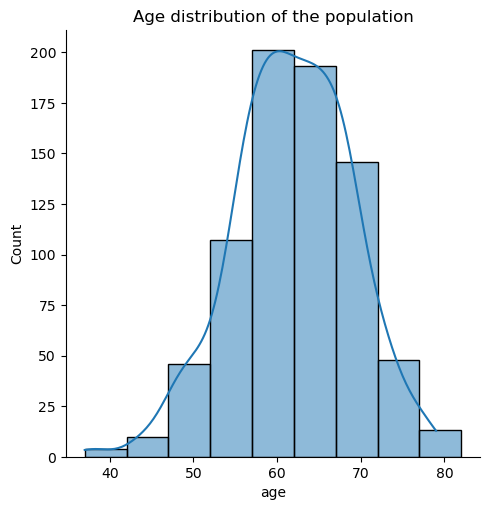

In [71]:
# Create univariate plot for Age and set the axis labels
age_univar_displot= sns.displot(clinical_study["age"], binwidth=5 , kde = True).set(title="Age distribution of the population")
age_univar_displot.set_axis_labels = ("Age", "Frequency")

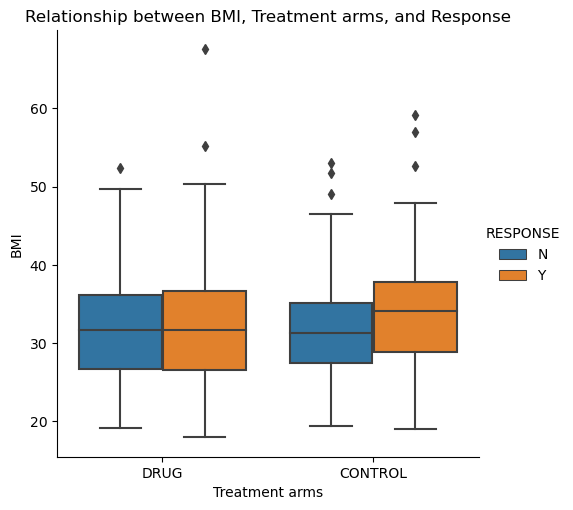

In [72]:
# Create a categorical plot
sns.catplot(data=clinical_study, y='BMI', hue='RESPONSE', x='trt_grp', kind='box')

# Set plot labels and title
plt.xlabel('Treatment arms')
plt.ylabel('BMI')
plt.title('Relationship between BMI, Treatment arms, and Response')

# Show the plot
plt.show()


(array([0, 1]), [Text(0, 0, 'N'), Text(1, 0, 'Y')])

<Figure size 1000x800 with 0 Axes>

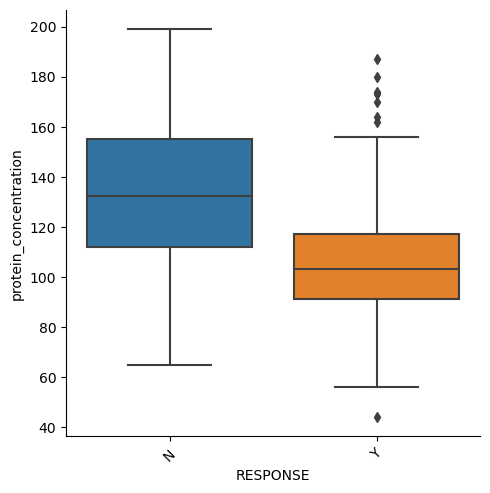

In [73]:
#Box plot of protein concentration conditioned on Response
plt.figure(figsize = (10, 8));
sns.catplot(x = "RESPONSE", y = "protein_concentration", data = clinical_study, kind = "box")
plt.xticks(rotation = 45)

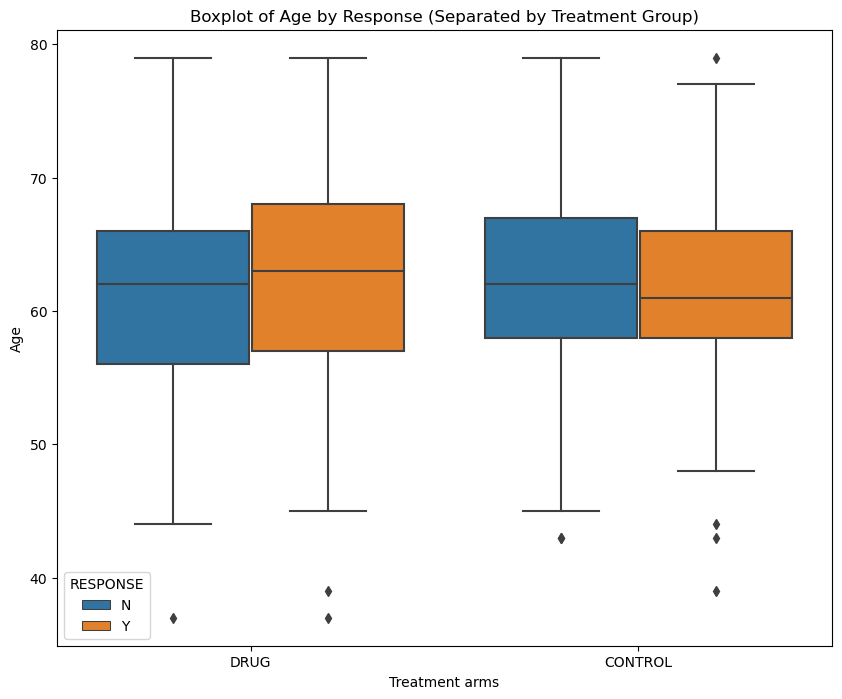

In [74]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot boxplot
sns.boxplot(data=clinical_study, hue='RESPONSE', y='age', x='trt_grp')

# Set labels and title
ax.set_xlabel('Treatment arms')
ax.set_ylabel('Age')
ax.set_title('Boxplot of Age by Response (Separated by Treatment Group)')


# Show the plot
plt.show()


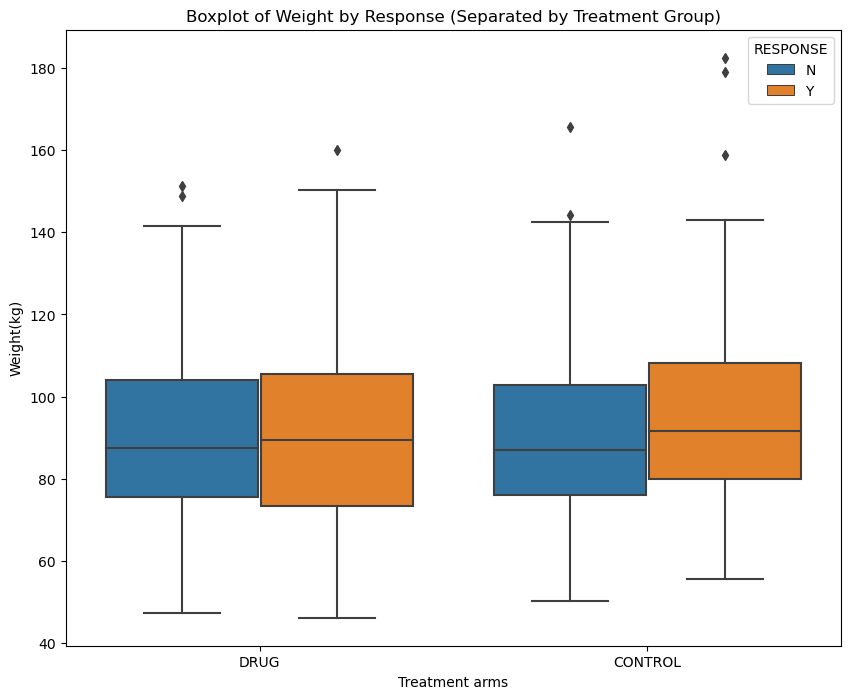

In [75]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot boxplot
sns.boxplot(data=clinical_study, hue='RESPONSE', y='weight', x='trt_grp')

# Set labels and title
ax.set_xlabel('Treatment arms')
ax.set_ylabel('Weight(kg)')
ax.set_title('Boxplot of Weight by Response (Separated by Treatment Group)')

# Show the plot
plt.show()


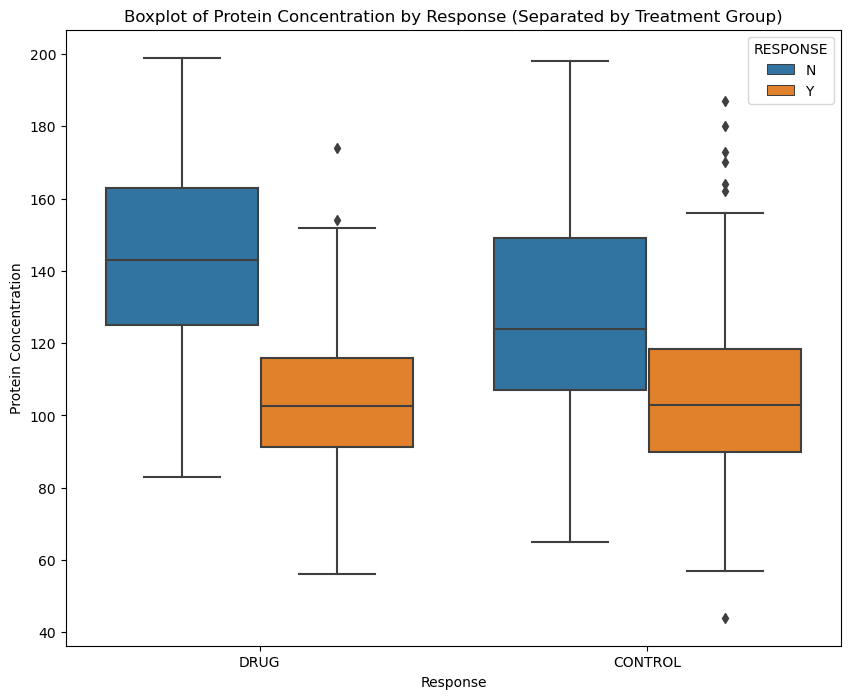

In [76]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot boxplot
sns.boxplot(data=clinical_study, hue='RESPONSE', y='protein_concentration', x='trt_grp')

# Set labels and title
ax.set_xlabel('Response')
ax.set_ylabel('Protein Concentration')
ax.set_title('Boxplot of Protein Concentration by Response (Separated by Treatment Group)')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Treatment Arms and Response')

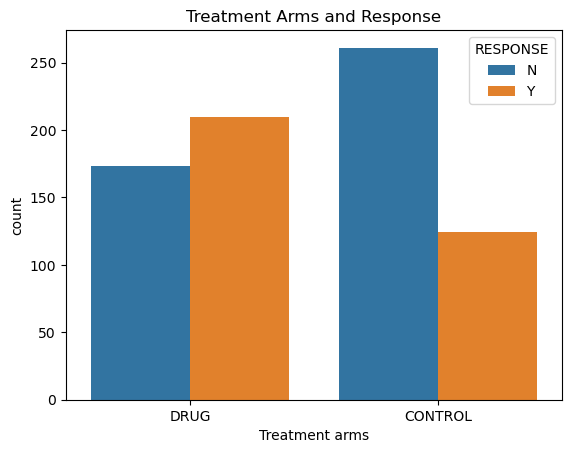

In [77]:
# plot of treatment arms and response
trt_response_plot = sns.countplot(data=clinical_study, x="trt_grp", hue="RESPONSE")

plt.xlabel("Treatment arms")

plt.title("Treatment Arms and Response")

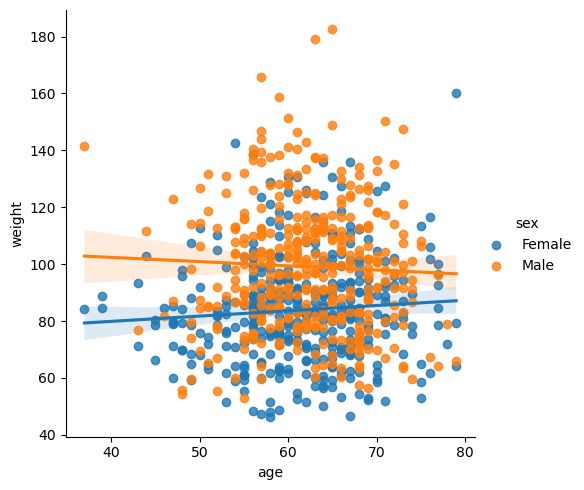

In [78]:
# Conditioned on Variety.
sns.lmplot(data=clinical_study, x='age', y='weight', hue='sex')

<AxesSubplot:xlabel='age', ylabel='weight'>

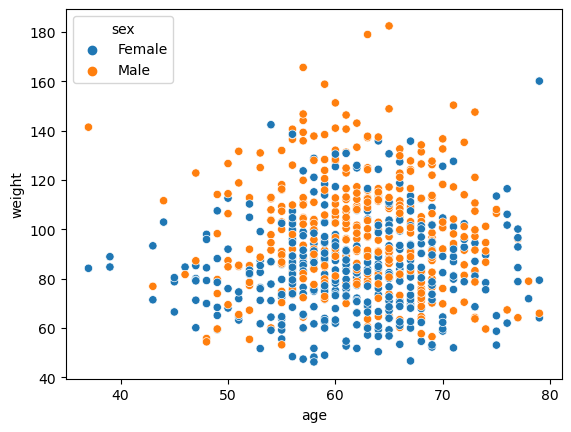

In [79]:
sns.scatterplot(data=clinical_study, x='age', y='weight',hue='sex')


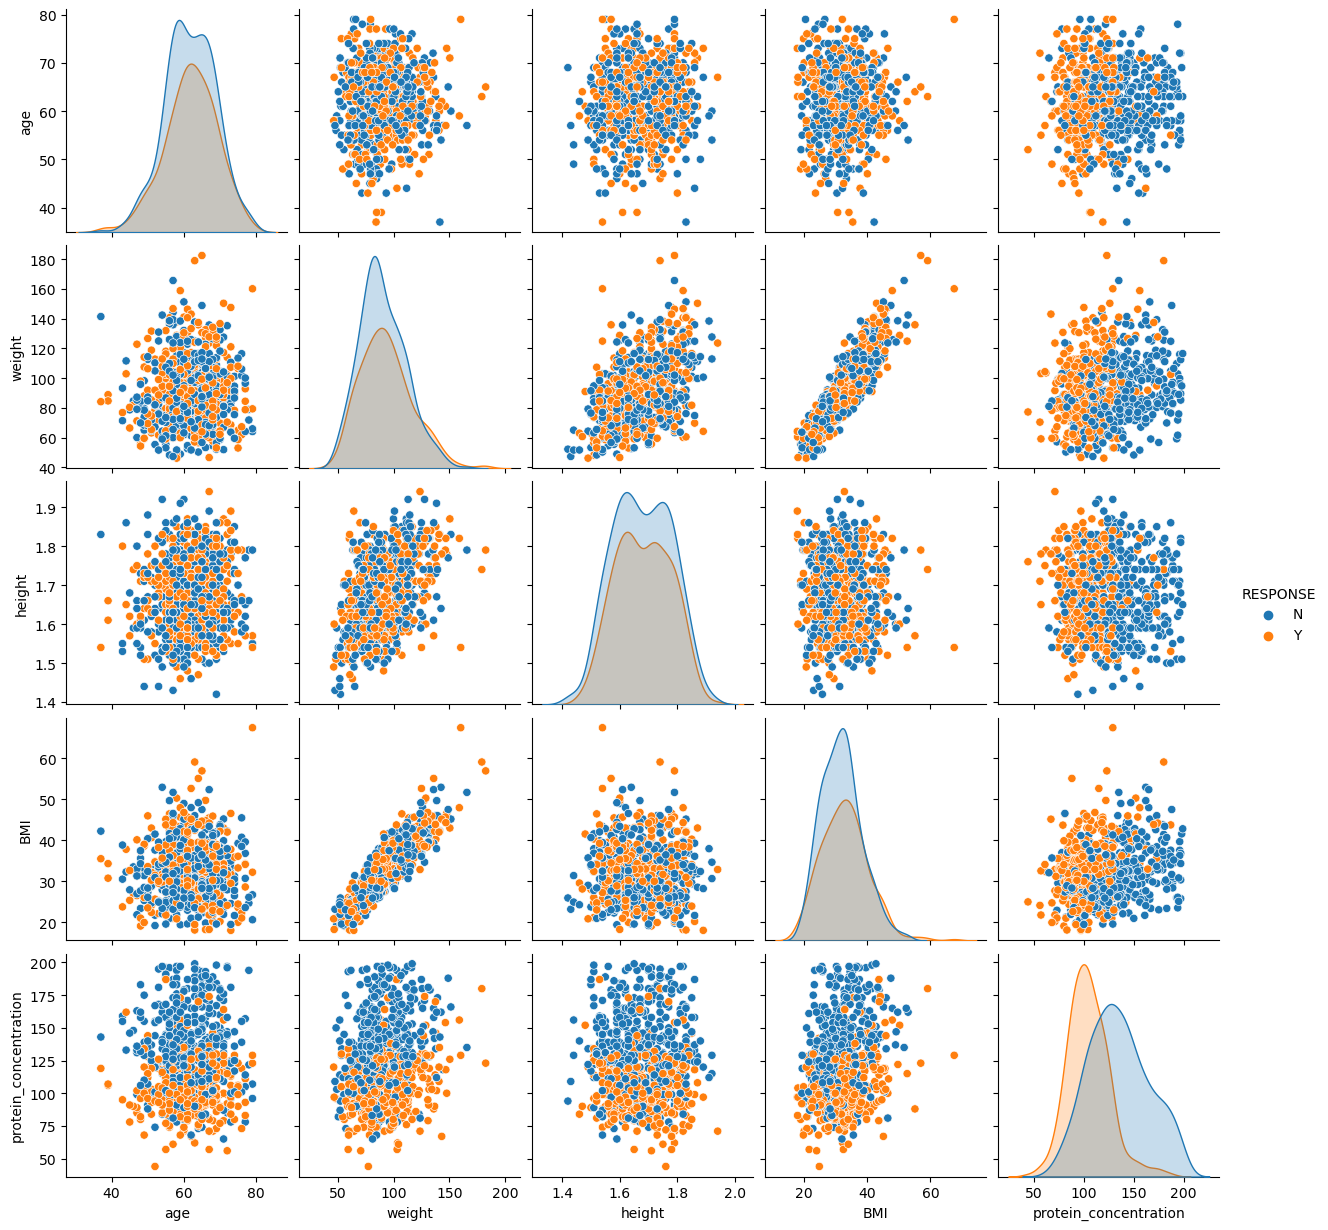

In [80]:
# Select all variables in the dataset
data = clinical_study[['subject_id', 'age', 'sex', 'weight', 'height', 'BMI', 'trt_grp', 'RESPONSE', 'protein_concentration']]

# Create a pairplot
sns.pairplot(data, hue='RESPONSE')

# Show the plot
plt.show()


## PREDICTION

### Can the age, weight or protein concentration of patients predict whether they will respond better to treatment or not?

The target variable is RESPONSE. This is because we want to determine whether age, weight or protein concentration predicts response better. This is therefore a binary classification task.

In [81]:
selected_variables = clinical_study.drop(["subject_id", "sex", "height", "trt_grp"], axis = 1)
selected_variables

,age,weight,BMI,RESPONSE,protein_concentration
0,46.0,84.660000,33.487599,N,148.000000
2,47.0,71.210000,26.476056,Y,85.000000
3,48.0,69.850000,23.338568,N,183.000000
4,59.0,62.940000,27.973333,Y,89.000000
5,59.0,113.910000,42.873273,N,137.000000
6,63.0,79.330000,25.321587,Y,116.000000
7,77.0,96.120000,30.680839,N,78.000000
8,57.0,93.500000,35.191388,N,115.000000
9,72.0,85.570000,30.318169,N,197.000000
10,73.0,82.727500,30.758291,Y,125.000000


In [82]:
clinical_study.columns

Index(['subject_id', 'age', 'sex', 'weight', 'height', 'BMI', 'trt_grp',
       'RESPONSE', 'protein_concentration'],
      dtype='object')

In [83]:
#Pick the variables that predicts the target by excluding the target variable on column axis
X = selected_variables.drop(["RESPONSE"], axis=1)

y= selected_variables["RESPONSE"] #Target variable:(output of the prediction)

In [84]:
# Convert categorical variable to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

The SMOTE (Synthetic Minority Over-sampling Technique) algorithm is employed here to address class imbalance. Class imbalance occurs when the number of instances in one class is significantly lower than the number of instances in another class. This imbalance can lead to biased models that perform poorly on the minority class. To reduce the chances of bias in the classification model to be used, SMOTE will be employed to resample the dataset before a classification model is used..

Text(0.5, 1.0, 'Target variable imbalance')

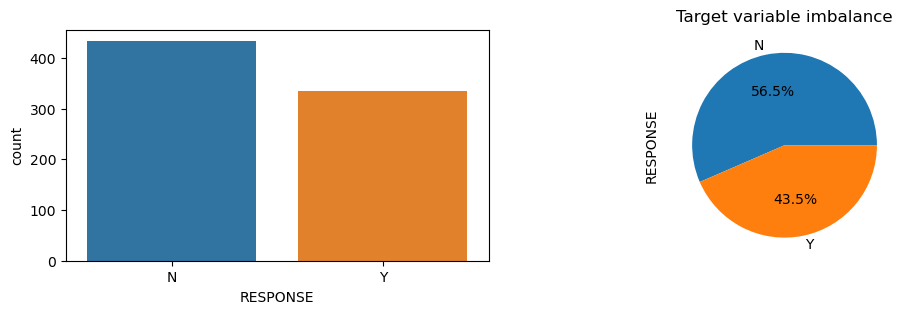

In [85]:
# seaborn plotting of the target variable to show imbalance in the original data classification
fig, ax_position=plt.subplots(1,2,figsize=(12,3),dpi=100) 
a = sns.countplot(x = 'RESPONSE', data = selected_variables, ax=ax_position[0]) 
a = selected_variables['RESPONSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) 
plt.title("Target variable imbalance")

In [86]:
#create an object for SMOTE and resample the dataset
smote = SMOTE(random_state=42, k_neighbors = 2)

# apply SMOTE to resample the dataset 
X_res, y_res = smote.fit_resample(X, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

Text(0.5, 1.0, 'Resampled RESPONSE')

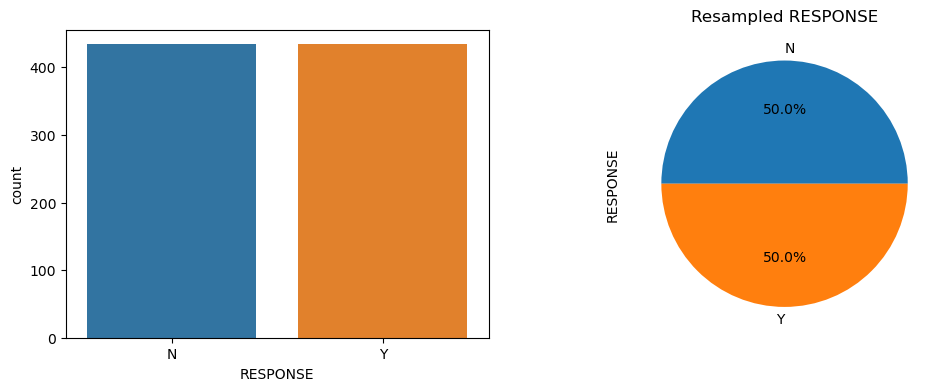

In [87]:
# Plot of the balanced resampled dataset  
bal_response = pd.concat([X_res,y_res], axis = 1) # creating a dataframe for the balanced dat
fig, ax=plt.subplots(1,2,figsize=(12,4)) # creating the axis shell for subplot
a = sns.countplot(x='RESPONSE',data=bal_response,  ax=ax[0]) # assigning each of the plot to th
a= bal_response['RESPONSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning ea

plt.title("Resampled RESPONSE")

In [88]:
#Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardise using MinMax scaler, create and train the model
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#create and train the model
LR_response = LogisticRegression(random_state = 42)
LR_response.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

In [89]:
LR_pred = LR_response.predict(X_test_scaled)  
print("Response Atrribute Classification Report for LogisticRegression Classifier()")  
print(classification_report(y_test,LR_pred))

Response Atrribute Classification Report for LogisticRegression Classifier()
              precision    recall  f1-score   support

           N       0.83      0.62      0.71        87
           Y       0.70      0.87      0.78        87

    accuracy                           0.75       174
   macro avg       0.76      0.75      0.74       174
weighted avg       0.76      0.75      0.74       174



In [90]:
print("Genre Atrribute Confusion Matrix for LogisticRegression Classifier()")
print(confusion_matrix(y_test, LR_pred))

Genre Atrribute Confusion Matrix for LogisticRegression Classifier()
[[54 33]
 [11 76]]


### Hyperparameter tuning using GridSearchCV for log regression 

In [91]:
response_LR_clf = LogisticRegression()
response_LR_clf

LogisticRegression()

In [92]:
grid_param = {
    'penalty' : ['l1','l2'], 
     'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [93]:
gscv = GridSearchCV(response_LR_clf,                   
                   param_grid = grid_param,  
                   scoring='accuracy', 
                   cv=5) 

In [94]:
gscv.fit(X_train_scaled, y_train)  # Fit the GridSearchCV object to the training data

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [95]:
print("Tuned Hyperparameters :", gscv.best_params_)
print("Accuracy :",gscv.best_score_)

Tuned Hyperparameters : {'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.7536231884057971


## Decision Tree Classifier

In [96]:
dt_clf = DecisionTreeClassifier()

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(dt_clf, X, y, cv=cv)

# Print mean and standard deviation of scores
print('Cross-validation scores: ', scores)
print('Mean score: ', scores.mean())
print('Standard deviation: ', scores.std())


Cross-validation scores:  [0.62643678 0.70689655 0.7183908  0.71676301 0.7283237 ]
Mean score:  0.6993621686266692
Standard deviation:  0.037090503870617623


In [97]:
# Fit classifier on entire dataset
dt_clf.fit(X, y)

DecisionTreeClassifier()

In [98]:
# Make predictions on testing data
y_pred = dt_clf.predict(X)


In [99]:
# Print classification report
print('Classification Report:')
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       434
           Y       1.00      1.00      1.00       434

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



In [100]:
# Print confusion matrix
print('Confusion Matrix for Rating in DecisionTreeClassifier() after crossvalidation:')
print(confusion_matrix(y, y_pred))

Confusion Matrix for Rating in DecisionTreeClassifier() after crossvalidation:
[[434   0]
 [  0 434]]


## RISK-BENEFIT RATIO

In [101]:
# Calculate the risks
risks = clinical_study.loc[clinical_study["RESPONSE"] == "N"].shape[0]

# Calculate the benefits
benefits = clinical_study.loc[clinical_study["protein_concentration"] > 0].shape[0]

# Calculate the risk-benefit ratio
risk_benefit_ratio = benefits / risks

print("Number of people not responding to treatment:", risks)
print("Number of people responding to treatment:", benefits)
print("Risk-Benefit Ratio:", risk_benefit_ratio)


Number of people not responding to treatment: 434
Number of people responding to treatment: 768
Risk-Benefit Ratio: 1.7695852534562213


REFERENCES

WMA - The World Medical Association-WMA Declaration of Helsinki – Ethical Principles for Medical Research Involving Human Subjects. (n.d.). Retrieved 3 June 2023, from https://www.wma.net/policies-post/wma-declaration-of-helsinki-ethical-principles-for-medical-research-involving-human-subjects/

Pai, M. P., & Paloucek, F. P. (2000). The Origin of the “Ideal” Body Weight Equations. Annals of Pharmacotherapy, 34(9), 1066–1069. https://doi.org/10.1345/aph.19381
